In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

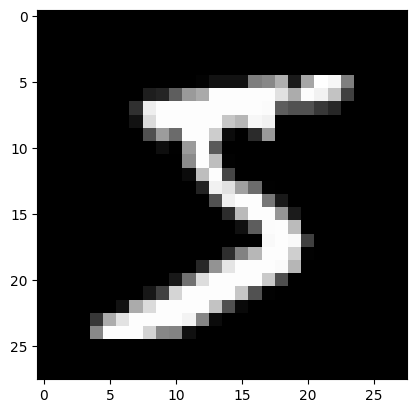

In [3]:
plt.imshow(x_train[0], cmap='gray') # imshow() function which simply displays an image.
plt.show() # cmap is responsible for mapping a specific colormap to the values found in the array that you passed as the first argument.


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # use 32-bit precision when training a neural network, so at one point the training data will have tc 
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255


In [7]:
num_classes = 10
y_train = np.eye(num_classes)[y_train] # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test] # f your particular categories is present then it mark as 1 else 0 in remain row


In [8]:
#main starts from here

#Define the model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # The input_shape argument is passed to the foremost layer. It comprises of 
model.add(Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu')) #returns a sequence of vectors of dimension 512
model. add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [9]:
#Compile the model
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [10]:
#Train the model
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # verbose=1 will show you an animated progress bar eg. [	]
                    validation_data=(x_test, y_test)) # Using validation_data means you are providing the training set and validation set # validation_split means you only provide a training set and keras splits it into '2


Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2534 - accuracy: 0.9227 - val_loss: 0.1077 - val_accuracy: 0.9662
Epoch 2/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1065 - accuracy: 0.9678 - val_loss: 0.0961 - val_accuracy: 0.9689
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0749 - accuracy: 0.9766 - val_loss: 0.0725 - val_accuracy: 0.9769
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.0744 - val_accuracy: 0.9788
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0490 - accuracy: 0.9845 - val_loss: 0.0753 - val_accuracy: 0.9797
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0526 - val_accuracy: 0.9847
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0649 - val_accuracy: 0.9811

In [11]:
#Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.08631588518619537
Test accuracy: 0.9840999841690063
